## Mohamad Jawad ABOU ALEIWI
## TP 1 - Unsupervised Learning

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, NMF
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture

# 1) Datasets:

# 1.3) Loading the data:

# Temperature Dataset:

In [2]:
# Load the data
temper = np.load("temper.npz")
print(temper.files)

['villes', 'data', 'varname']


In [3]:
# Store in memory
villes = temper['villes']
data = temper['data']
varname = temper['varname']
x1 = data[:, :12]
months = varname[:12]

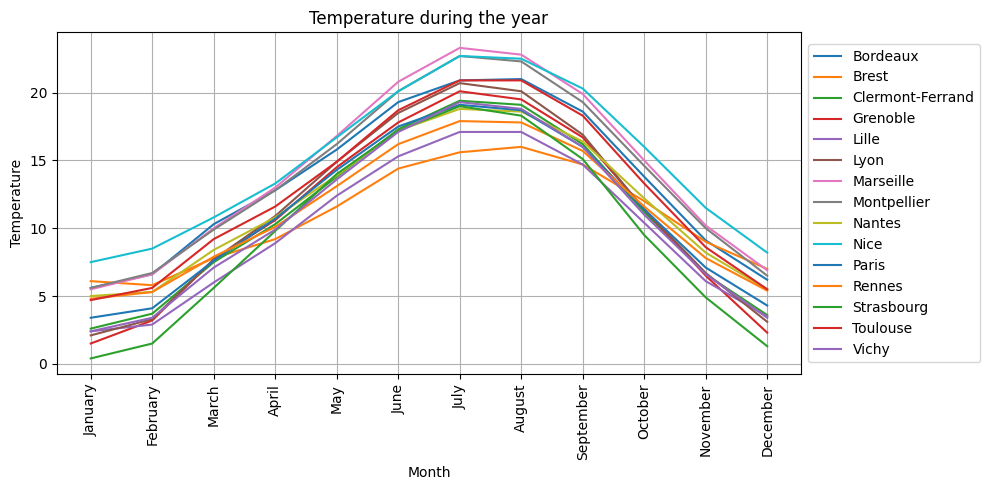

In [4]:
# Plot the data of temperature dataset
pl.figure(figsize=(10, 5))
for i in range(x1.shape[0]):
    pl.plot(months, x1[i], label=villes[i])
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.title('Temperature during the year')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.xticks(rotation=90)
pl.grid(True)
pl.tight_layout()
pl.show()

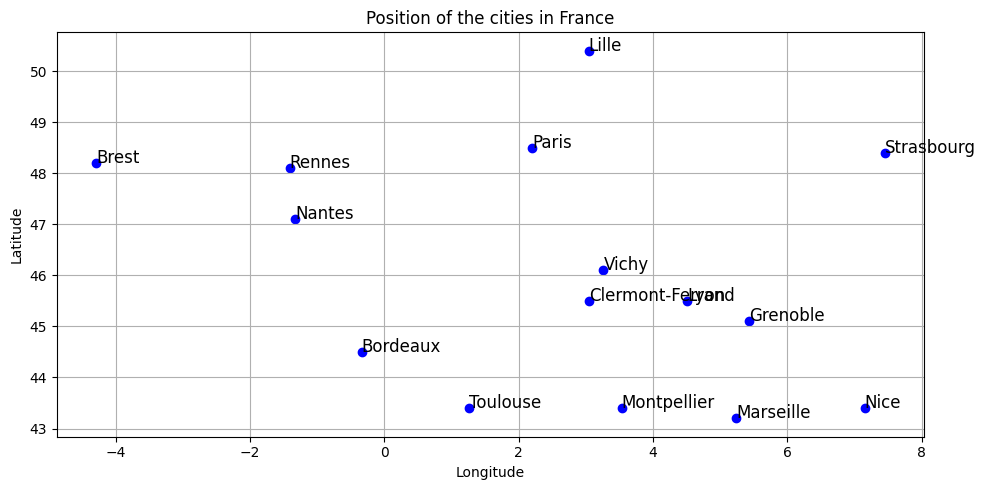

In [5]:
# Plot the position of the cities in France
latitude = data[:, -2]
longitude = data[:, -1]

pl.figure(figsize=(10, 5))
pl.scatter(longitude, latitude, c='blue')

for i, ville in enumerate(villes):
    pl.annotate(ville, (longitude[i], latitude[i]), fontsize=12)
    
pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Position of the cities in France')
pl.grid(True)
pl.tight_layout()

Text(0.5, 1.0, 'Yearly average temperature for different cities in France')

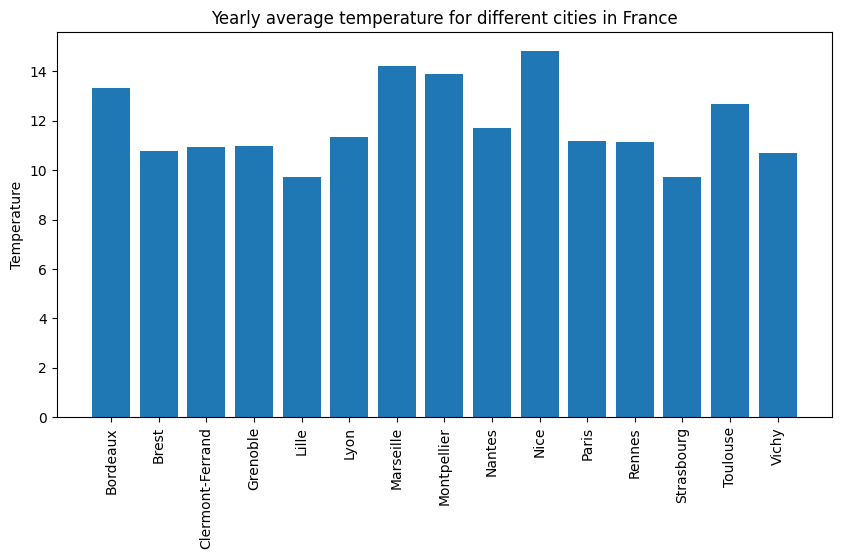

In [6]:
# Compute the average yearly temperature of each city
mean_temper = x1.mean(axis=1)

pl.figure(figsize=(10,5))

pl.bar(villes, mean_temper)
pl.xticks(rotation=90)
pl.ylabel('Temperature')
pl.title('Yearly average temperature for different cities in France')

# Digits Dataset:

In [7]:
# Load the data of digits dataset
digits = np.load("digits.npz")
print(digits.files)

['xt', 'yt', 'y', 'x']


In [8]:
# Store in memory
x2 = digits['x']
xt2 = digits['xt']
y2 = digits['y']
yt2 = digits['yt']

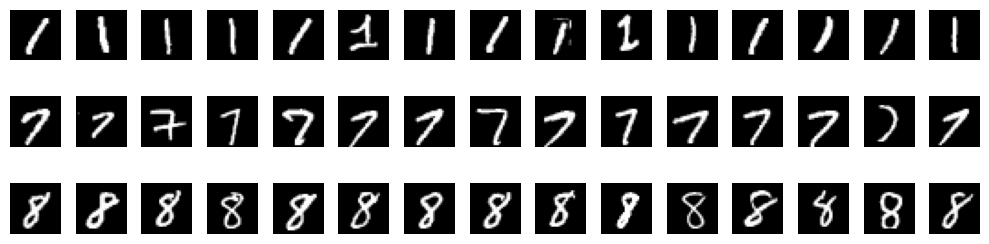

In [9]:
# Visualize some samples of the digits dataset
pl.figure(figsize=(10, 3))
for i in range(15):
    pl.subplot(3, 15, i + 1)
    image = x2[i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    pl.subplot(3, 15, i + 1 + 15)
    image = x2[1000 + i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    pl.subplot(3, 15, i + 1 + 2 * 15)
    image = x2[2000 + i].reshape(28, 28)
    pl.imshow(image, cmap='gray')
    pl.axis('off')
pl.tight_layout()
pl.show()

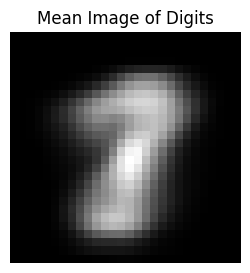

In [10]:
# Compute the mean image of the digits dataset
x2 = x2/ 255.0
xt2 = xt2 / 255.0
mean_digits = np.mean(x2, axis=0).reshape(28, 28)
pl.figure(figsize=(3, 3))
pl.imshow(mean_digits, cmap='gray')
pl.title('Mean Image of Digits')
pl.axis('off')
pl.show()

# 2) Clustering:

# 2.1 For both datasets:

# Temperature Dataset:

In [11]:
# Perform K-means clustering on the temperature dataset
kmeans_temper = KMeans(n_clusters=3, random_state=0).fit(x1[:, :12])
centroids_temper = kmeans_temper.cluster_centers_
labels_temper = kmeans_temper.labels_

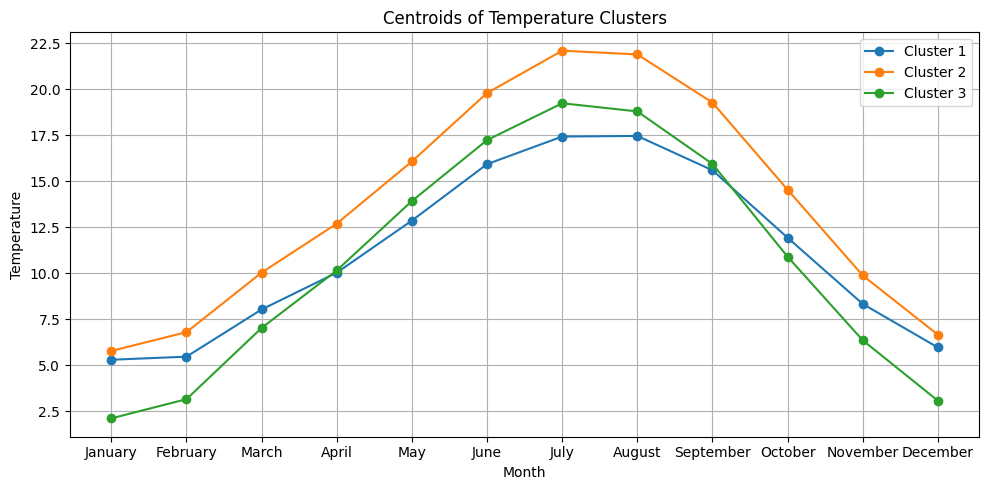

In [12]:
# Plot the centroids of clusters of temperature dataset
pl.figure(figsize=(10, 5))
for i in range(centroids_temper.shape[0]):
    pl.plot(varname[:12], centroids_temper[i], marker='o', label=f'Cluster {i+1}')
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.title('Centroids of Temperature Clusters')
pl.legend()
pl.grid(True)
pl.tight_layout()
pl.show()

The cities are clustered according to their temperatures since the centroids have different temperature levels. 
The cities are clustered according to their geographical locations. This is because cities with low longitude and relatively high latitude, high longitude and relatively low latitude and high longitude and relatively high latitude are grouped in three clusters respectively. This result is expected since cities that are near to each other have similar weather conditions.

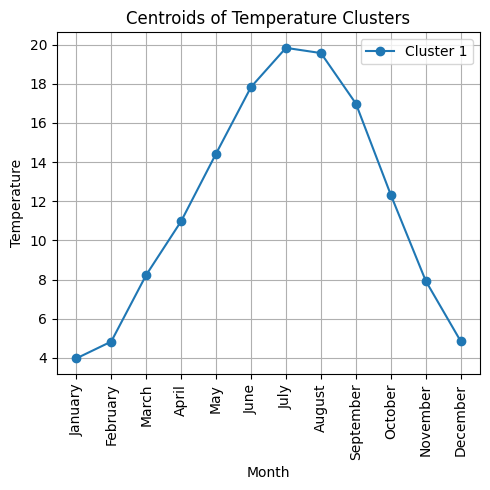

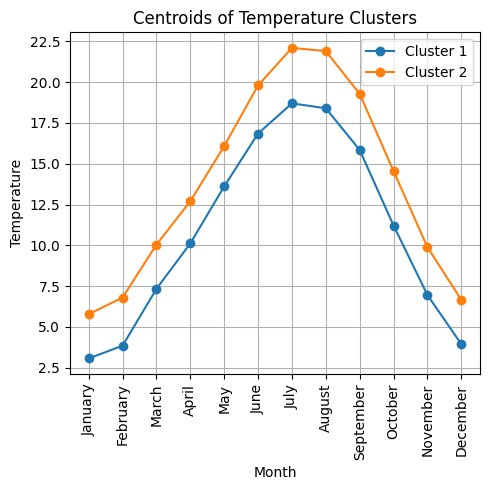

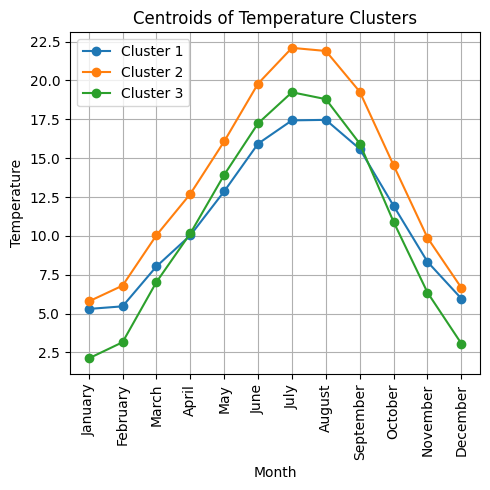

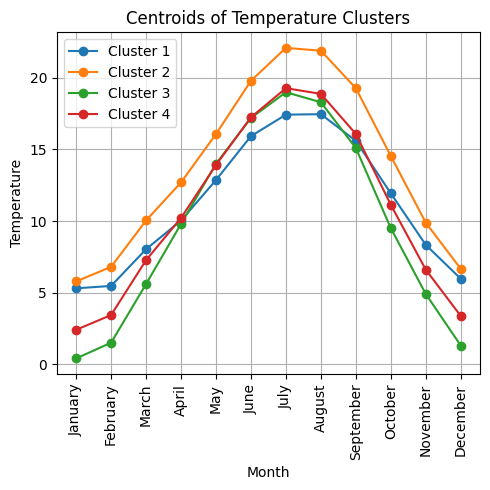

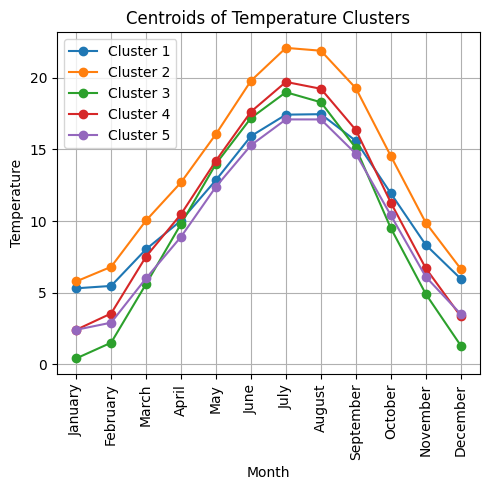

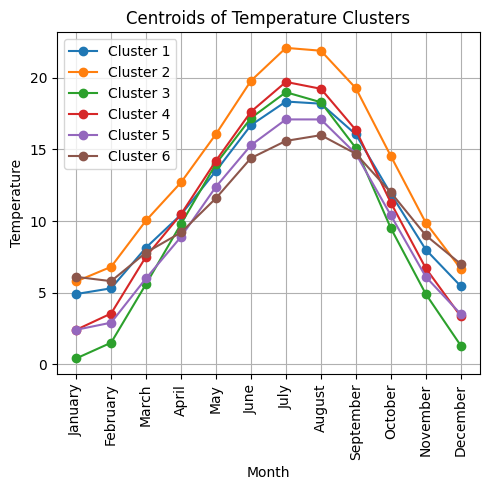

In [13]:
# Perform K-means clustering with differnet values of k on the temperature dataset
# Plot the centoids of clusters of temperature dataset for different values of k
k_values = range(1, 7)
for k in k_values:

    kmeans_temper = KMeans(n_clusters=k, random_state=0).fit(x1[:, :12])
    centroids1 = kmeans_temper.cluster_centers_
    labels1 = kmeans_temper.labels_


    pl.figure(figsize=(5, 5))
    for i in range(k):
        pl.plot(varname[:12], centroids1[i], marker='o', label=f'Cluster {i+1}')
    pl.xlabel('Month')
    pl.ylabel('Temperature')
    pl.xticks(rotation=90)
    pl.title('Centroids of Temperature Clusters')
    pl.legend()
    pl.grid(True)
    pl.tight_layout()
    pl.show()

From the previous plots, 3 and 4 are good values for the number of clusters for the temperature dataset. This is because the centroids for K=3 and K=4 are relatively equally spaced and share the data fairly. For number of clusters less than 3 or 4, the data is not fairly clustered, also if the number of clusters is more than 3 or 4 we can notice from the plots that some clusters can be merged, their centroid plots are too close to each other.

# Digit Dataset:

In [14]:
# Perform K-means clustering on the digits dataset
kmeans_digits = KMeans(n_clusters=3, random_state=0).fit(x2)
centroids_digits = kmeans_digits.cluster_centers_
labels_digits = kmeans_digits.labels_

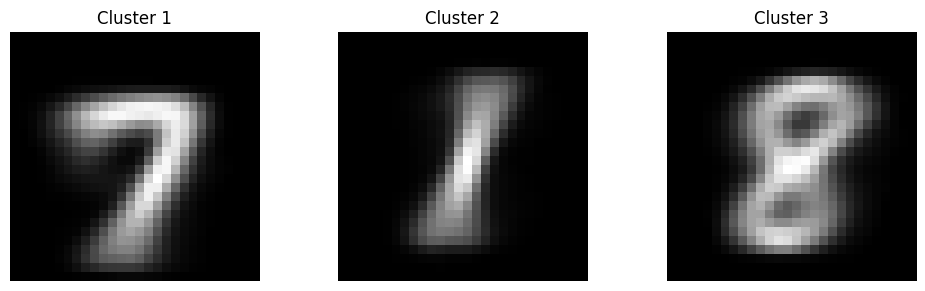

In [15]:
# Show the centroids of clusters of digits dataset
pl.figure(figsize=(10, 3))
for i in range(centroids_digits.shape[0]):
    pl.subplot(1, centroids_digits.shape[0], i + 1)
    pl.imshow(centroids_digits[i].reshape(28, 28), cmap='gray')
    pl.title(f'Cluster {i+1}')
    pl.axis('off')
pl.tight_layout()
pl.show()

From these images, the digits dataset is clustered according to their corresponding digits, since each of the centroids represent a different digit. Thus, we obtain three clusters corresponding each to one of the 1, 7 and 8 digits.

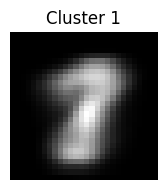

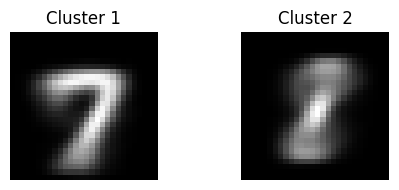

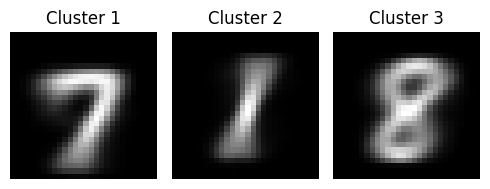

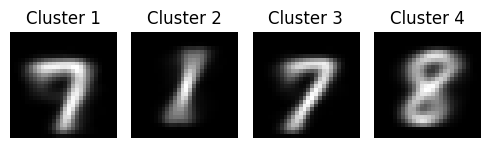

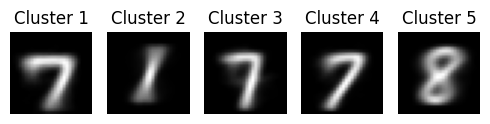

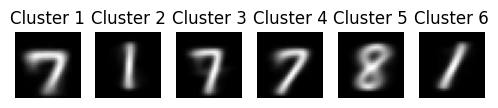

In [16]:
# Perform K-means clustering with different values of k on the digits dataset
# Plot the centroids of clusters of digits dataset for different values of k
for k in k_values:

    kmeans_digits = KMeans(n_clusters=k, random_state=0).fit(x2)
    centroids2 = kmeans_digits.cluster_centers_
    labels2 = kmeans_digits.labels_
    
    pl.figure(figsize=(5, 2))
    for i in range(k):
        pl.subplot(1, k, i + 1)
        pl.imshow(centroids2[i].reshape(28, 28), cmap='gray')
        pl.title(f'Cluster {i+1}')
        pl.axis('off')
    
    pl.tight_layout()
    pl.show()

For digits data, three clusters might be appropriate if there are three distinct classes (1, 7, 8). Taking less than this number, the clusters are not fairly represents the all labels. More than this number, redundancy takes place.

# 2.2) Temperature Dataset:

In [17]:
# Name of the cities in each cluster of temperature dataset
for i in range(centroids_temper.shape[0]):
    print("Cluster", i+1, "contains:", villes[labels_temper == i])

Cluster 1 contains: ['Brest' 'Nantes' 'Rennes']
Cluster 2 contains: ['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']
Cluster 3 contains: ['Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy']


The clustering is expected, since each cluster contains a set of cities that have similar weather conditions.

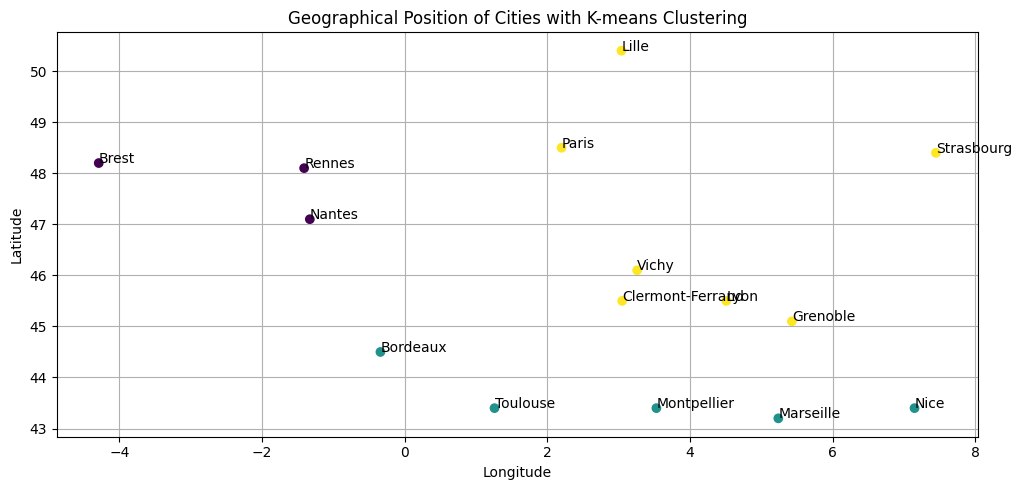

In [18]:
# Clustering based on the geographical position of the cities
pl.figure(figsize=(10, 5))
pl.scatter(longitude, latitude, c=labels_temper)
pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Geographical Position of Cities with K-means Clustering')
pl.grid(True)
pl.tight_layout()

for i, ville in enumerate(villes):
    pl.annotate(ville, (longitude[i], latitude[i]))

pl.show()

The K-means clustering on temperature does recover a geographical similarity between cities. This is because cities with low longitude and relatively high latitude, high longitude and relatively low latitude and high longitude and relatively high latitude are grouped in three clusters respectively. This result is logical and kind of expected since cities that are near to each other geographically have similar weather conditions.

# 2.3) Digits dataset:

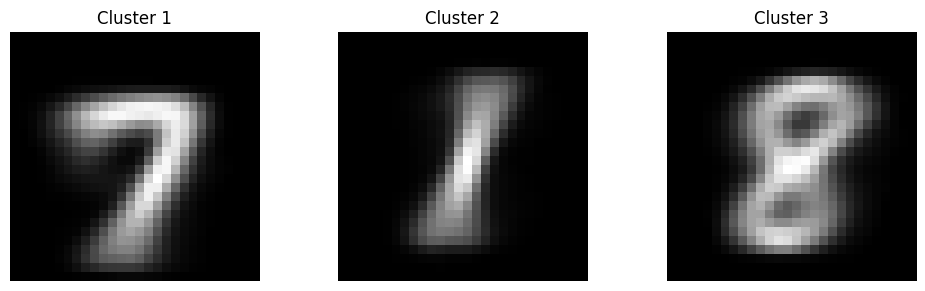

In [19]:
# The centroids of clusters of digits dataset
pl.figure(figsize=(10, 3))
for i in range(centroids_digits.shape[0]):
    pl.subplot(1, centroids_digits.shape[0], i + 1)
    pl.imshow(centroids_digits[i].reshape(28, 28), cmap='gray')
    pl.title(f'Cluster {i+1}')
    pl.axis('off')
pl.tight_layout()
pl.show()

The centroids are true images of the 1, 7 and 8 digits. This is totally logical since the centroid of a cluster represents the common part of its cluster elements. In this case, it is the common digit of each cluster.

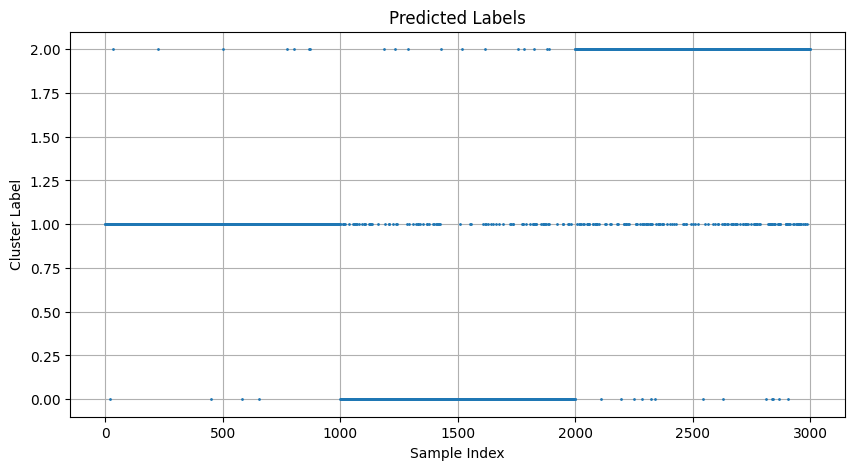

In [20]:
# Plot the predicted labels of digits dataset
pl.figure(figsize=(10, 5))
pl.plot(labels_digits, marker='o', linestyle='None', markersize=1)
pl.xlabel('Sample Index')
pl.ylabel('Cluster Label')
pl.title('Predicted Labels')
pl.grid(True)
pl.show()

The plot representing the clustering labels is almost piecewise constant, but not perfect as expected from the real data. The first third of the samples is labeled by 1, the second third of the samples is labeled either 0 or 2.

In [21]:
# The quality of the clustering using the ground truth labels
y_flat = y2.flatten()
print(f'Rand Index: {rand_score(y_flat, labels_digits)}')
print(f'Adjusted Rand Index: {adjusted_rand_score(y_flat, labels_digits)}')

Rand Index: 0.8839530954762699
Adjusted Rand Index: 0.7405571626609085


The clustering results are quite good based on these metrics.
Rand Index of 0.88: High overall agreement between the two clusterings.
Adjusted Rand Index of 0.74: Strong clustering performance, with significant agreement beyond what would occur by chance.

K-means clustering with k = 3, is considered as a good clustering, since both scores are high.

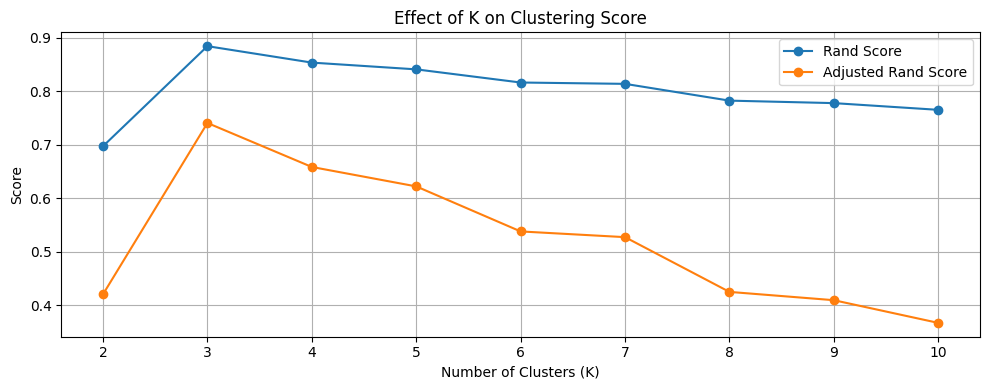

In [22]:
# Effect of K on clustering scores
K_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
rand_scores = []
adjusted_rand_scores = []

for K in K_values:
    kmeans_digits = KMeans(n_clusters=K, random_state=0).fit(x2)
    labels_digits = kmeans_digits.labels_
    rand_scores.append(rand_score(y_flat, labels_digits))
    adjusted_rand_scores.append(adjusted_rand_score(y_flat, labels_digits))

pl.figure(figsize=(10, 4))
pl.plot(K_values, rand_scores, marker='o', label='Rand Score')
pl.plot(K_values, adjusted_rand_scores, marker='o', label='Adjusted Rand Score')
pl.xlabel('Number of Clusters (K)')
pl.ylabel('Score')
pl.title('Effect of K on Clustering Score')
pl.legend()
pl.grid(True)
pl.tight_layout()
pl.show()

Since both the Rand Index and Adjusted Rand Index are at their highest when K=3, this indicates that the clustering structure with three clusters is most consistent with the true underlying structure of the data. After K=3, the performance starts to drop, which means that adding more clusters doesn't provide a better partition and may lead to overfitting (splitting the data too finely).

As K increases, clustering scores decline, which usually means that the additional clusters are not improving the partitioning of the data. This could be due to noise or redundancy being introduced into the model, which diminishes the quality of the clustering.

# 3) Density Estimation:
# 3.1) For both datasets:

# Temperature Dataset:

In [23]:
# Apply GMM on temperature dataset
gmm_temper = GaussianMixture(n_components=2, covariance_type='diag').fit(x1[:, :12])

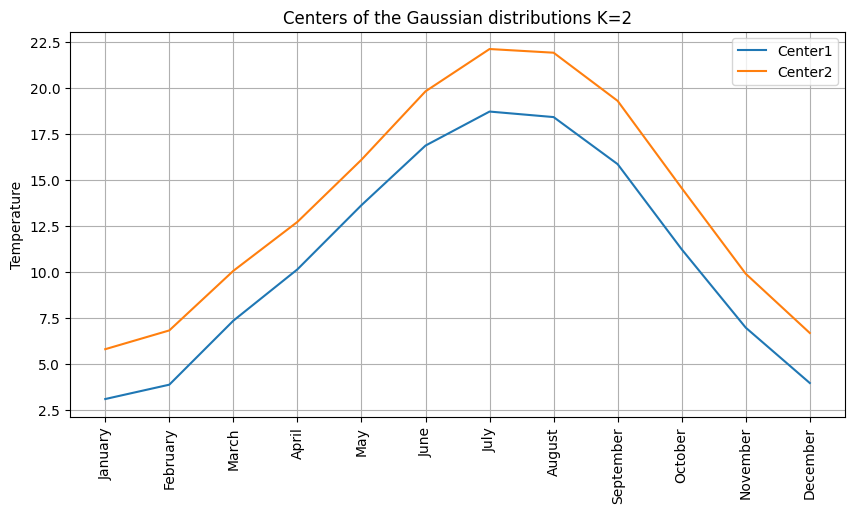

In [24]:
# Plot the centers of the Gaussian distributions
gmm_temper_center = gmm_temper.means_
pl.figure(figsize=(10,5))
for i in range(2):
    pl.plot(varname[:-2], gmm_temper_center[i,:], label='Center'+str(i+1))

pl.title('Centers of the Gaussian distributions K=' + str(2) )
pl.ylabel('Temperature')
pl.xticks(rotation=90)
pl.legend()
pl.grid()

The first distribution corresponds to cities with a relatively high temperature level and the second one to those with relatively low temperature levels. We can also note that there is no interception between the gaussian centers. 

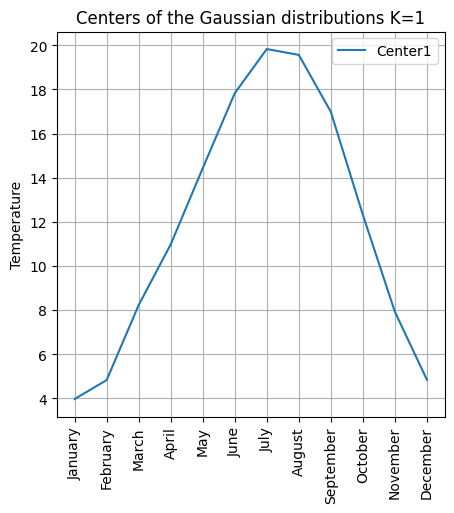

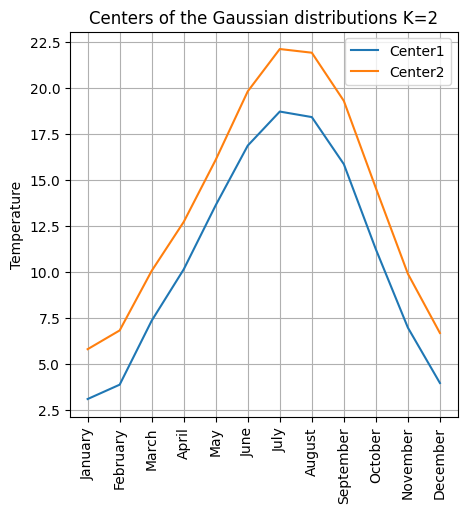

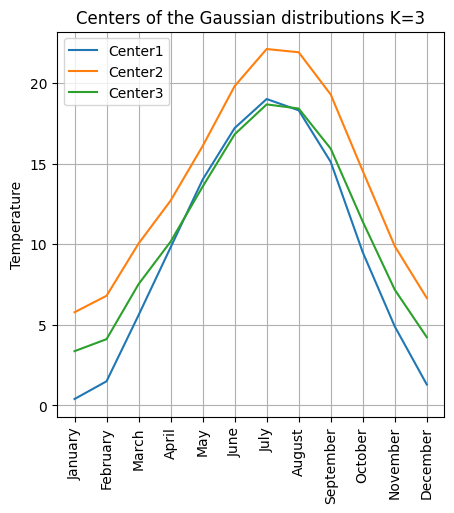

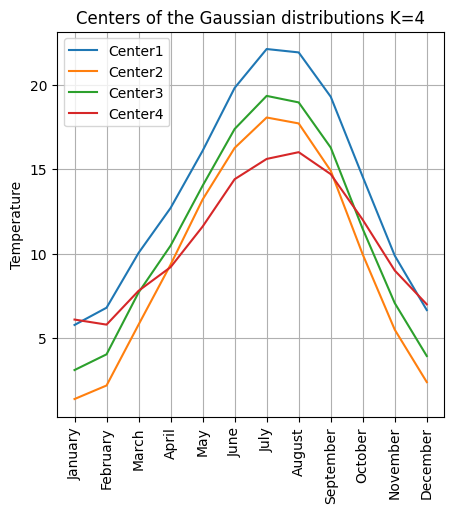

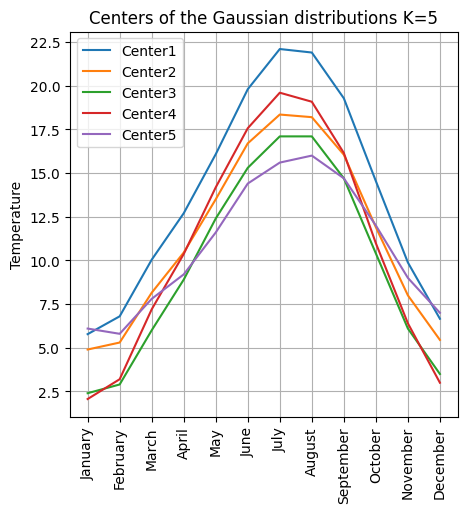

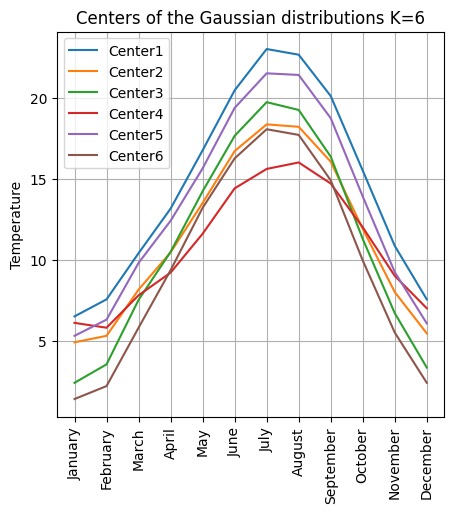

In [25]:
# Apply GMM on temperature dataset with different values of k (diag covariance)
for k in k_values:
    gmm1 = GaussianMixture(n_components=k, covariance_type='diag').fit(x1[:, :12])
    gmm_centers1 = gmm1.means_

    pl.figure(figsize=(5,5))
    for i in range(k):
        pl.plot(varname[:-2], gmm_centers1[i,:], label='Center'+str(i+1))

    pl.title('Centers of the Gaussian distributions K=' + str(k) )
    pl.ylabel('Temperature')
    pl.xticks(rotation=90)
    pl.legend()
    pl.grid()

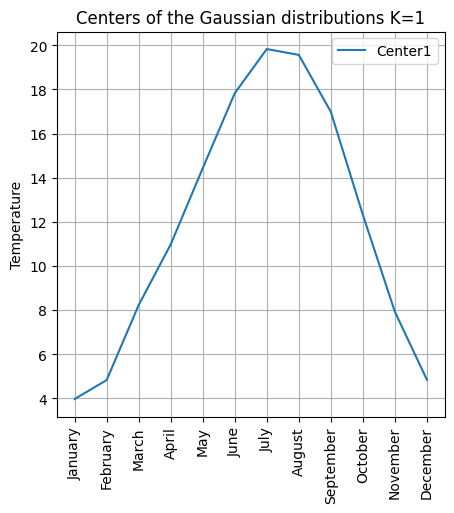

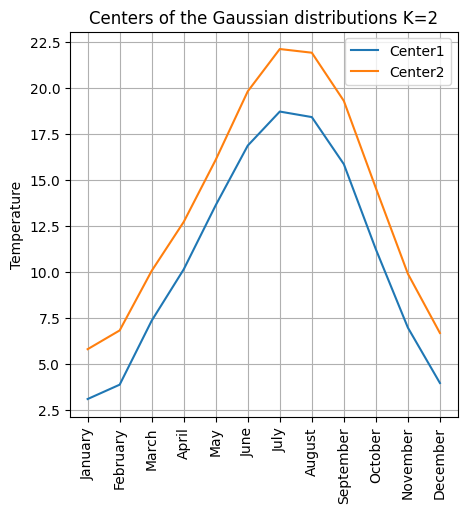

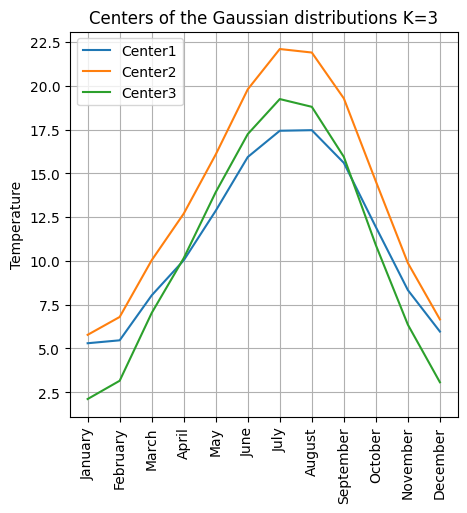

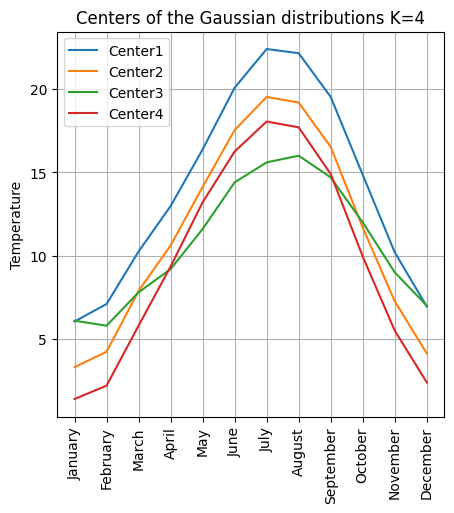

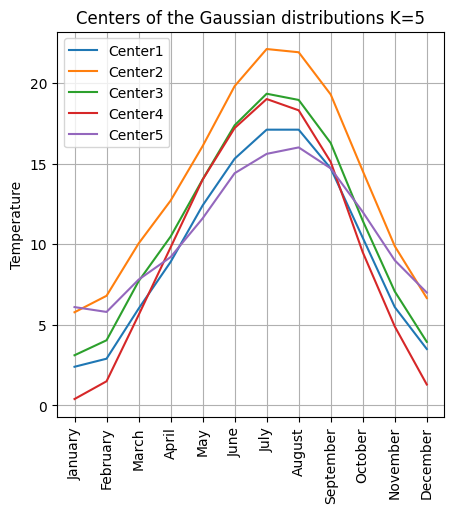

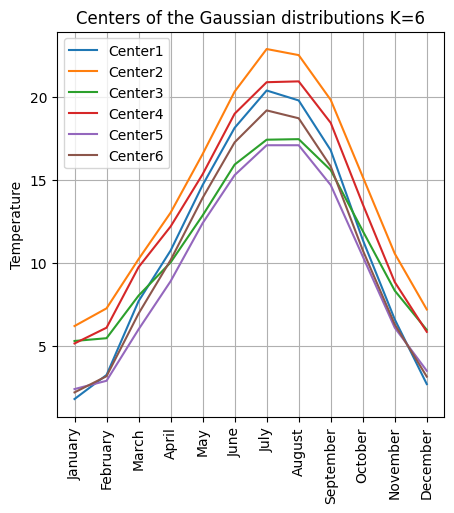

In [26]:
# Apply GMM on temperature dataset with different values of k (full covariance)
for k in k_values:
    gmm1 = GaussianMixture(n_components=k, covariance_type='full').fit(x1[:, :12])
    gmm_centers1 = gmm1.means_

    pl.figure(figsize=(5,5))
    for i in range(k):
        pl.plot(varname[:-2], gmm_centers1[i,:], label='Center'+str(i+1))

    pl.title('Centers of the Gaussian distributions K=' + str(k) )
    pl.ylabel('Temperature')
    pl.xticks(rotation=90)
    pl.legend()
    pl.grid()

Three and four are good values for the number of clusters for the temperature dataset. This is because the centroids for K=3 and K=4 are relatively equally spaced and share the data fairly. As for the covariance type, no major changes are noticed in the results of both plots.

In [27]:
# Log probability of the samples for the estimated density
log_temper = gmm_temper.score_samples(x1[:, :12])
dic_temper = dict(zip(villes, log_temper))

In [28]:
# Sort the cities based on the log-likelihood
dic_temper = dict(sorted(dic_temper.items(), key=lambda item: item[1]))
print('French cities sorted from lower score to higher score by log-likelihood:')
for key in dic_temper.keys():
    print(key, end=' ')

French cities sorted from lower score to higher score by log-likelihood:
Brest Strasbourg Toulouse Lille Nice Lyon Nantes Grenoble Rennes Paris Marseille Clermont-Ferrand Vichy Bordeaux Montpellier 

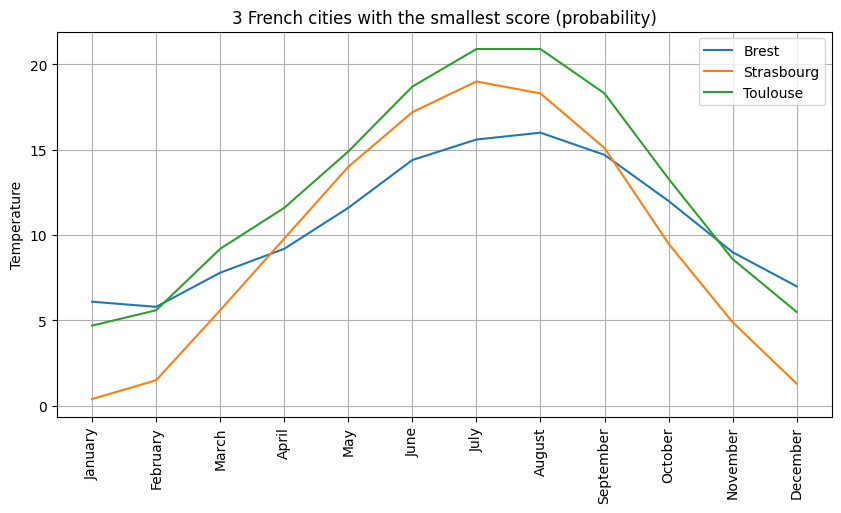

In [29]:
# Plot the 3 French cities with the smallest score (probability)
count=0
pl.figure(figsize=(10, 5))
for k in dic_temper.keys():
    pl.plot( varname[:-2], x1[np.argwhere(villes==k),:].flatten(), label=k) 
    count +=1
    if count==3:
        break
    
pl.title('3 French cities with the smallest score (probability)')
pl.xticks(rotation=90)
pl.ylabel('Temperature')
pl.legend()
pl.grid()

Text(0, 0.5, 'Temperature')

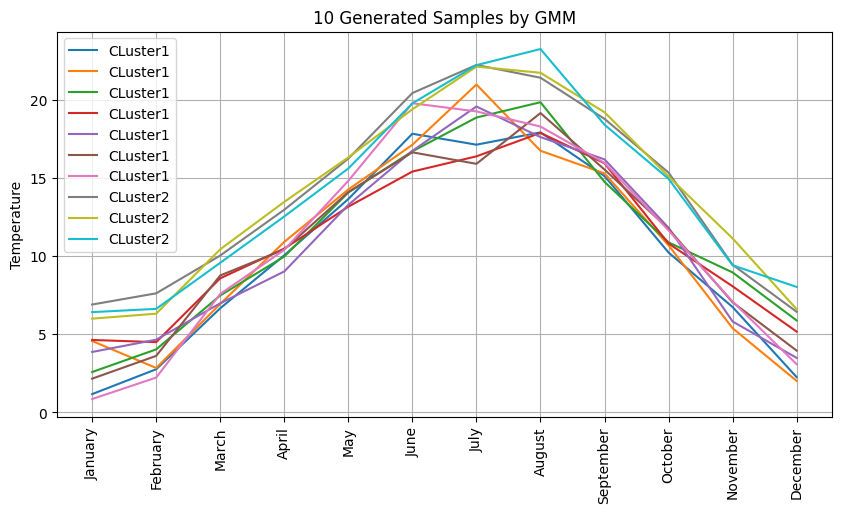

In [30]:
# Generate 10 samples from the distribution
sample, label = gmm_temper.sample(10)
pl.figure(figsize=(10, 5))
for i in range(sample.shape[0]):
    pl.plot(varname[:-2], sample[i, :], label='CLuster'+str(label[i]+1)) 
pl.title('10 Generated Samples by GMM')
pl.xticks(rotation=90)
pl.grid()
pl.legend()
pl.ylabel('Temperature')


The generated sample images can be easily differentiated from temperature data. We can notice from the previous plot that the generated temperature data isn't as smooth as the original temperature data.

# Digits Dataset:

In [31]:
# Apply GMM on digits dataset
gmm_digits = GaussianMixture(n_components=3, covariance_type='diag').fit(x2)

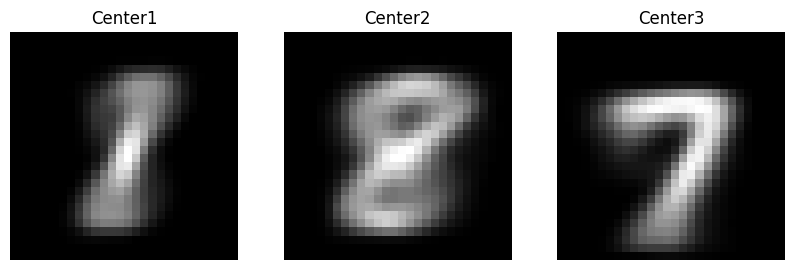

In [32]:
# Display the centers of the Gaussian distributions
gmm_digits_center = gmm_digits.means_
pl.figure(figsize=(10,5))
for i in range(3):
    pl.subplot(1,3,i+1)
    pl.imshow(gmm_digits_center[i,:].reshape(28,28), cmap='gray')
    pl.title('Center'+str(i+1))
    pl.axis('off')

There is three Gaussian distributions with centers given in the previous images. We notice that the Gaussian centers correspond to the three digits:1, 8 and 7. However, we can note that the Gaussian centers aren't as clear as the KMeans clustering centroids.

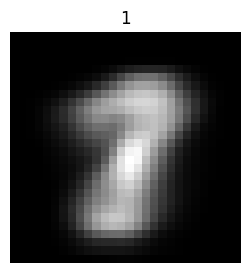

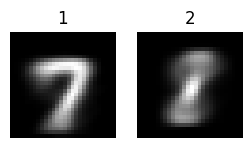

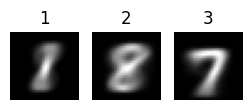

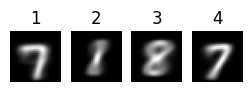

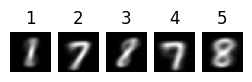

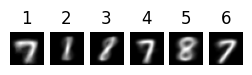

In [33]:
# Apply GMM on digits dataset for different values of k (diag covariance)
for k in k_values:
    gmm2 = GaussianMixture(n_components=k, covariance_type='diag').fit(x2)
    gmm_centers2 = gmm2.means_

    pl.figure(figsize=(3,3))
    for i in range(k):
        pl.subplot(1,k,i+1)
        pl.imshow(gmm_centers2[i,:].reshape(28,28), cmap='gray')
        pl.title(str(i+1))
        pl.axis('off')

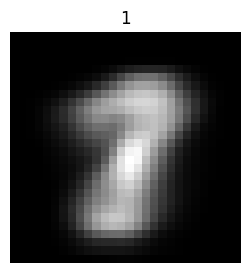

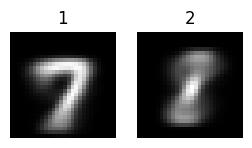

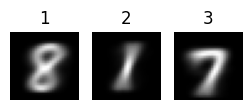

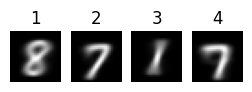

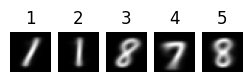

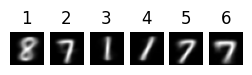

In [34]:
# Apply GMM on digits dataset for different values of k (full covariance)
for k in k_values:
    gmm2 = GaussianMixture(n_components=k, covariance_type='full').fit(x2)
    gmm_centers2 = gmm2.means_

    pl.figure(figsize=(3, 3))
    for i in range(k):
        pl.subplot(1,k,i+1)
        pl.imshow(gmm_centers2[i,:].reshape(28,28), cmap='gray')
        pl.title(str(i+1))
        pl.axis('off')

We notice that K=3 is so far the best value for the number of clusters for the digits dataset. This is because the obtained centroids for K>3 are always one of the three following digits: 1, 7 and 8 since the digits dataset contains only these three digits.

As for the covariance type, we notice that the centers obtained with a full covariance are more precise than those obtained with a diagonal covariance.

In [35]:
# Log probability of the samples for the estimated density
log_digits = gmm_digits.score_samples(x2)
dic_digits = dict(zip(np.array(range(3000)), log_digits))

In [36]:
dic_digits = dict(sorted(dic_digits.items(), key=lambda item: item[1]))

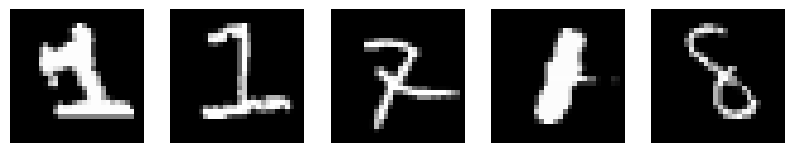

In [37]:
# Plot the 5 digits with the smallest score (probability)
count=0
pl.figure(figsize=(10,9))
for k in dic_digits.keys():
    pl.subplot(1, 5, count+1)
    pl.axis('off')
    pl.imshow(x2[k,:].reshape(28,28), cmap="gray") 
    count += 1
    if count == 5:
        break

In [38]:
# Estimate the labels of the samples and compute the clustering scores
y_hat = gmm_digits.predict(x2).flatten()
print(f'Rand Index: {rand_score(y_hat, labels_digits)}')
print(f'Adjusted Rand Index: {adjusted_rand_score(y_hat, labels_digits)}')

Rand Index: 0.6701467155718572
Adjusted Rand Index: 0.18446939660191225


The GMM model is not fitting the data as well, at least in terms of log probability. K-means seems to be performing better based on the Rand Index and Adjusted Rand Index, indicating that it produces clusters that align well with the data's natural structure.
GMM, on the other hand, gives lower scores, likely due to its more complex assumptions (covariance type, cluster shape). GMM might be less suited to the dataset.

In [39]:
# Generate samples from the distribution
sample_digits, label_digits = gmm_digits.sample(20)

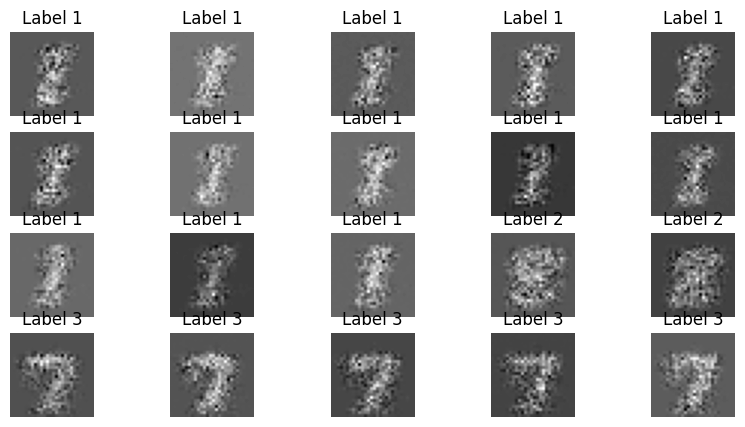

In [40]:
pl.figure(figsize=(10, 5))

for i in range(sample_digits.shape[0]):
    pl.subplot(4, 5, i + 1)
    pl.imshow(sample_digits[i].reshape(28, 28), cmap='gray')
    pl.title('Label '+str(label_digits[i]+1))
    pl.axis('off')

The generated sample images can be easily differentiated from real digits images. We notice that the generated samples are very noisy and can't be easily identified.

# 4) Dimensionality Reduction:

# 4.1) Linear Projection: Principal Component Analysis

# Temperature dataset:

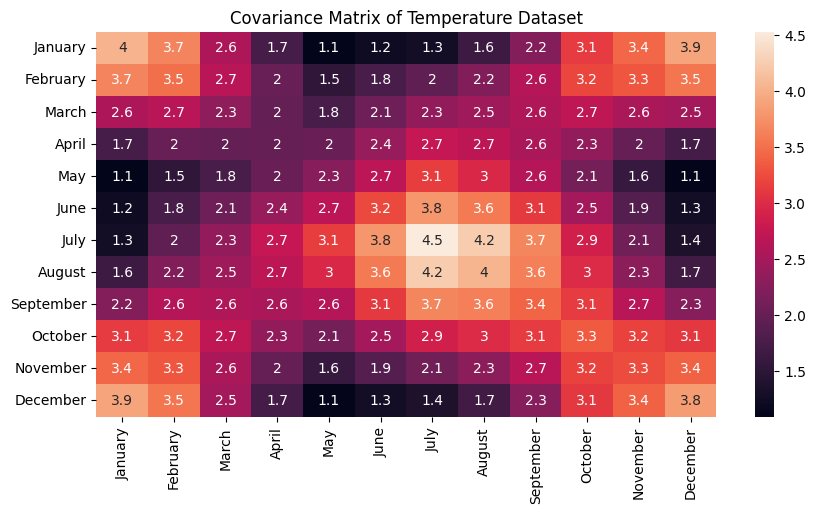

In [41]:
# Compute the covariance matrix of the dataset
# Plot the covariance matrix
temper_cov = np.cov(x1[:, :12].T)

pl.figure(figsize=(10, 5))
sns.heatmap(temper_cov, annot=True, xticklabels=varname[:-2], yticklabels= varname[:-2])
pl.title('Covariance Matrix of Temperature Dataset')
pl.show()

The consecutive features (months) also have a relatively high covariance. This can be explained by the fact that succeeding months have similar weather conditions and thus similar temperatures' behavior since they generally belong to the same season. Months of June, July, August are highly correlated with each other since they all belong to the summer season. Same applies for the months of December, January and February.

In [42]:
# Compute the PCA
temper_pca = PCA(n_components=None).fit(x1[:, :12])

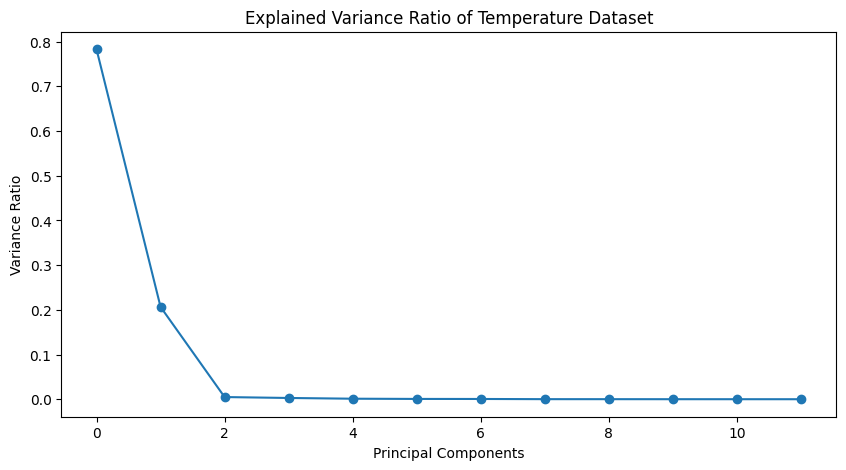

In [43]:
# Recover the explained variance ratio
pl.figure(figsize = (10, 5))
pl.plot(temper_pca.explained_variance_ratio_, marker='o')
pl.xlabel('Principal Components')
pl.ylabel('Variance Ratio')
pl.title('Explained Variance Ratio of Temperature Dataset')
pl.show()

In [44]:
print('Explained variance ratios of the first two components are', temper_pca.explained_variance_ratio_[:2]*100)

Explained variance ratios of the first two components are [78.31103051 20.65698985]


When projecting on p = 2 dimensions, the quantity of information that is preserved is given by the sum of the explained variance ratios of the first two PCA components. Therefore, approximatively 98% of the dataset's information is preserved and there is no considerable loss when projecting to the 2D space.

In [45]:
# Project the samples in 2D
temper_pca = PCA(n_components=2).fit(x1[:, :12])
temper_projected = temper_pca.transform(x1[:, :12])

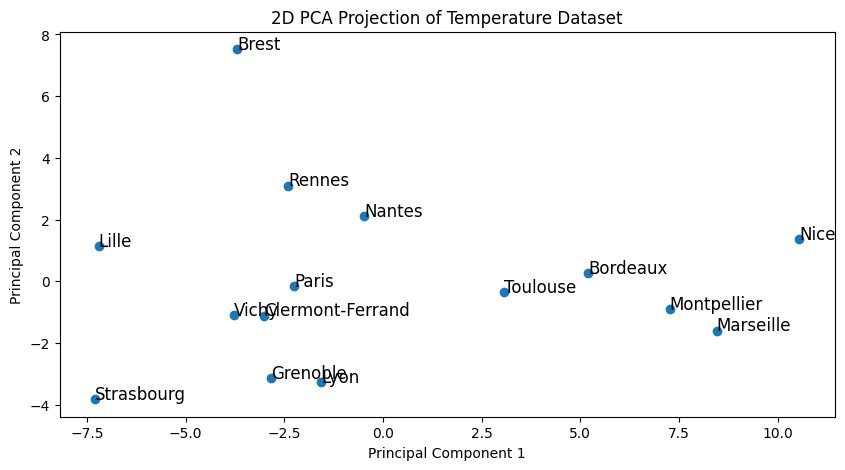

In [46]:
# Plot the projected samples
pl.figure(figsize=(10, 5))
pl.scatter(temper_projected[:, 0], temper_projected[:, 1])
for i, city in enumerate(villes):
    pl.text(temper_projected[i, 0], temper_projected[i, 1], city, fontsize=12)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.title('2D PCA Projection of Temperature Dataset')
pl.show()

The geographical positions are recovered since Toulouse, Bordeaux, Montpellier, Marseille, Nice remain close to each other in the projection to the 2D space. Same applies to the cities of Vichy, Clermont-Ferrand, Grenoble and Lyon and the cities of Rennes and Nantes that remain close to each other.

In [47]:
# The two first principal directions
temper_com = temper_pca.components_
print("Principal Component 1:", temper_com[0])
print("Principal Component 2:", temper_com[1])

Principal Component 1: [0.27765046 0.29726177 0.26549892 0.24426184 0.23276055 0.27461466
 0.31796069 0.32160147 0.32149157 0.32257588 0.2946594  0.27575128]
Principal Component 2: [ 0.44271144  0.29596995  0.07437784 -0.10733591 -0.25565325 -0.3209949
 -0.40635887 -0.31355378 -0.1457905   0.09718023  0.25000485  0.41750952]


Text(0, 0.5, 'component 2')

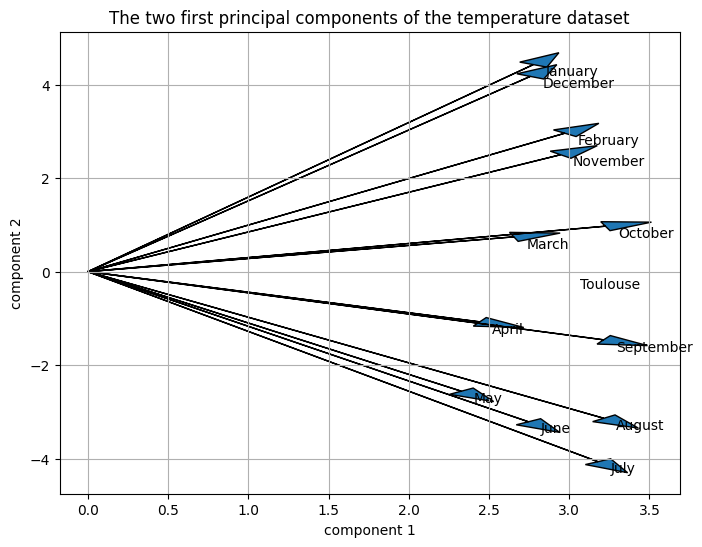

In [48]:
# Plotting the first two principal components
pl.figure(figsize=(8,6))

for i in range(15):
    pl.annotate(villes[i], (temper_projected[i, 0], temper_projected[i, 1]))

for i in range(12):
    pl.arrow(0, 0, temper_com.T[i,0]*10**1, temper_com.T[i,1]*10**1, head_width=0.2)
    pl.annotate(varname[i], xy=(temper_com.T[i,0]*10**1, temper_com.T[i,1]*10**1), xytext=(9, -8), textcoords='offset points')

pl.grid()
pl.title('The two first principal components of the temperature dataset')
pl.xlabel('component 1')
pl.ylabel('component 2')

The first principal component can therefore be viewed as a measure of the temperature of the months of July, August, September and October. Moving along its direction in the original space means that the temperature of the cities is increasing during the months of July, August, September and October.

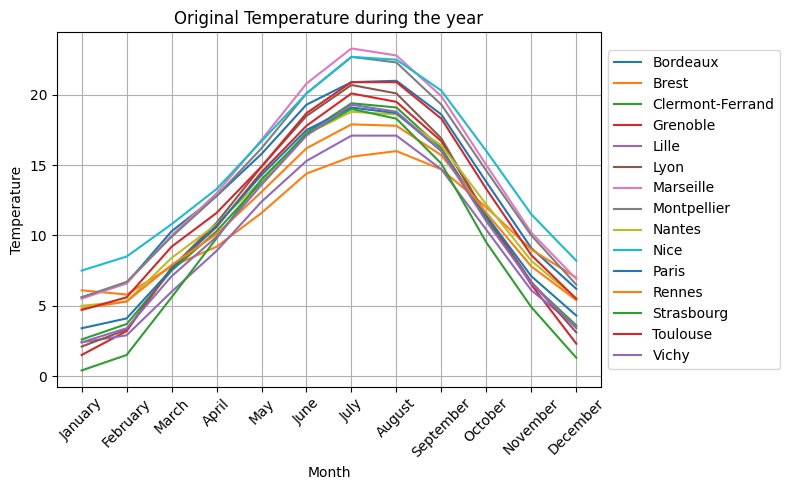

In [49]:
# Plot the original temperature during the year
pl.figure(figsize=(8, 5))
for i in range(x1.shape[0]):
    pl.plot(months, x1[i], label=villes[i])
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.title('Original Temperature during the year')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.xticks(rotation=45)
pl.grid(True)
pl.tight_layout()
pl.show()

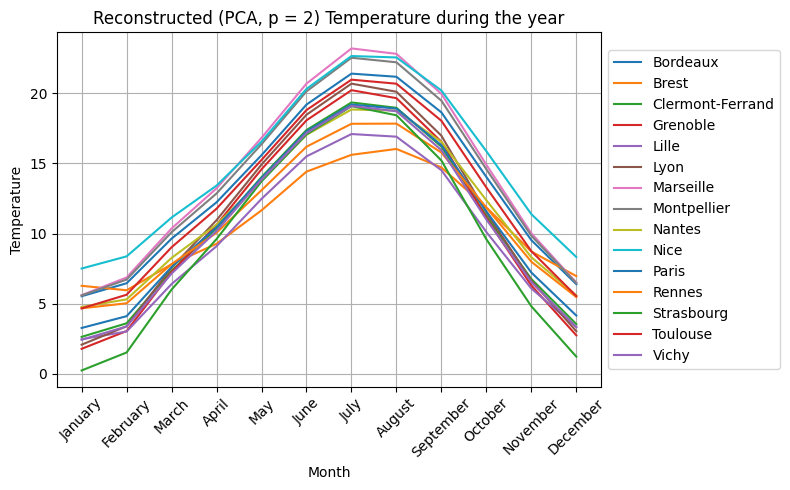

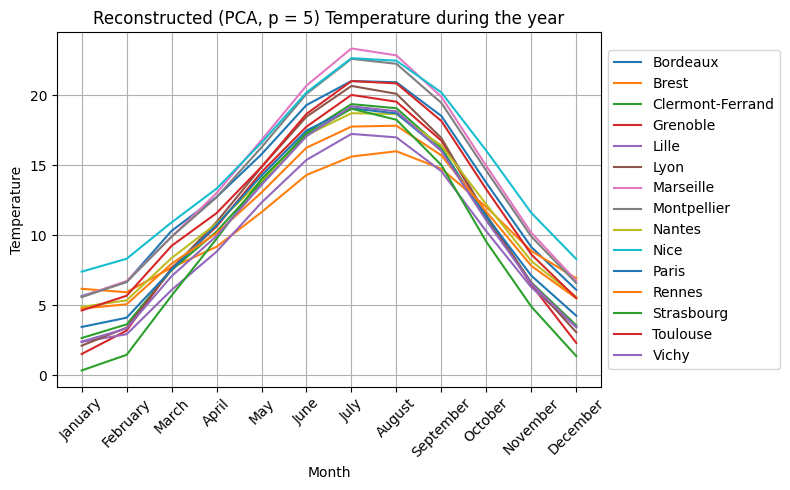

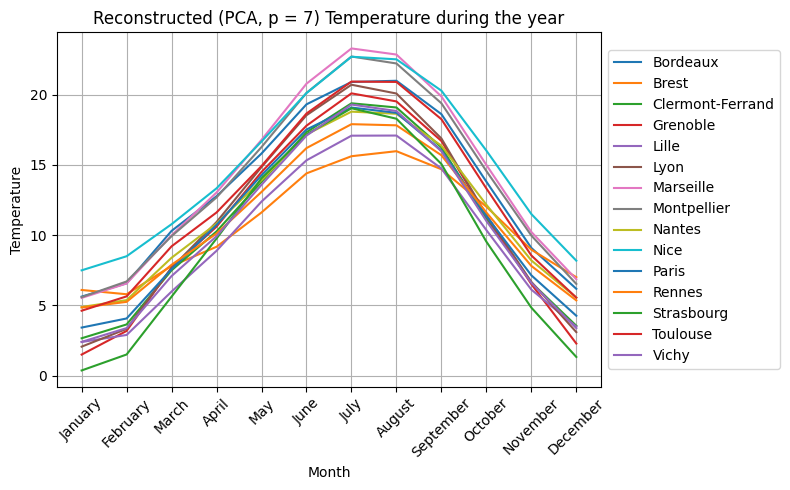

In [50]:
# Reconstruct the data from the projected samples
p_values = [2, 5, 7]
for p in p_values:
    temper_pca1 = PCA(n_components=p).fit(x1[:, :12])
    temper_projected1 = temper_pca1.transform(x1[:, :12])
    temper_reconstructed1 = temper_pca1.inverse_transform(temper_projected1)

    pl.figure(figsize=(8, 5))
    for i in range(x1.shape[0]):
        pl.plot(months, temper_reconstructed1[i], label=villes[i])
    pl.xlabel('Month')
    pl.ylabel('Temperature')
    pl.title("Reconstructed (PCA, p = " + str(p)+ ") Temperature during the year")
    pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    pl.xticks(rotation=45)
    pl.grid(True)
    pl.tight_layout()
    pl.show()

The reconstructed samples are recognizable since they're nearly identical to the original samples. This result is totally logical since, as demonstrated before, the temperature data is present in a 2D space and it is therefore preserved when projecting on p = 2 dimensions. Thus, when reconstructing the data, only noise and no considerable information is lost. 
When increasing the number of dimensions p to 4 and then 7, no major changes in the reconstructed samples are noticed. This is expected since, as shown before, nearly no relevant temperature data is present in dimensions higher than 2. Therefore, the samples reconstructed with p higher than 2 are identical to those with p = 2.

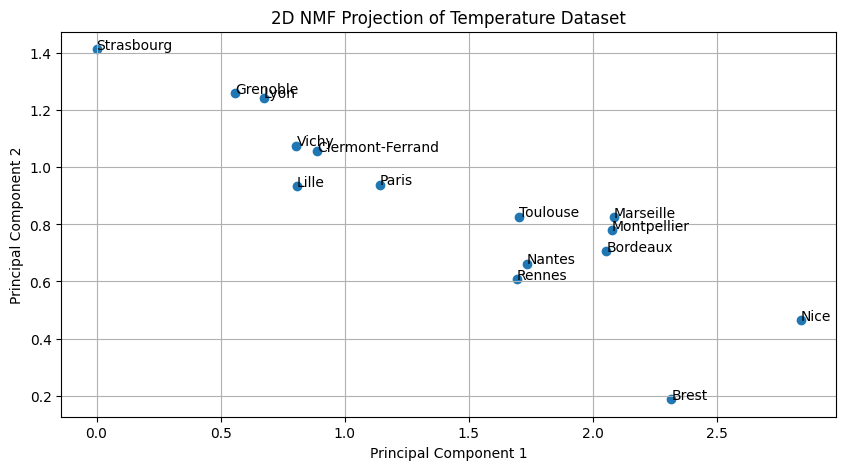

In [51]:
# Compute the NMF
temper_nmf = NMF(n_components=2).fit(x1[:, :12])
# Project the samples in 2D
temper_nmf_projected = temper_nmf.transform(x1[:, :12])
# Plot the projected samples
pl.figure(figsize=(10, 5))
pl.scatter(temper_nmf_projected[:, 0], temper_nmf_projected[:, 1])
for i in range(15):
    pl.annotate(villes[i], (temper_nmf_projected[i, 0], temper_nmf_projected[i, 1]))
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.grid()
pl.title('2D NMF Projection of Temperature Dataset')
pl.show()

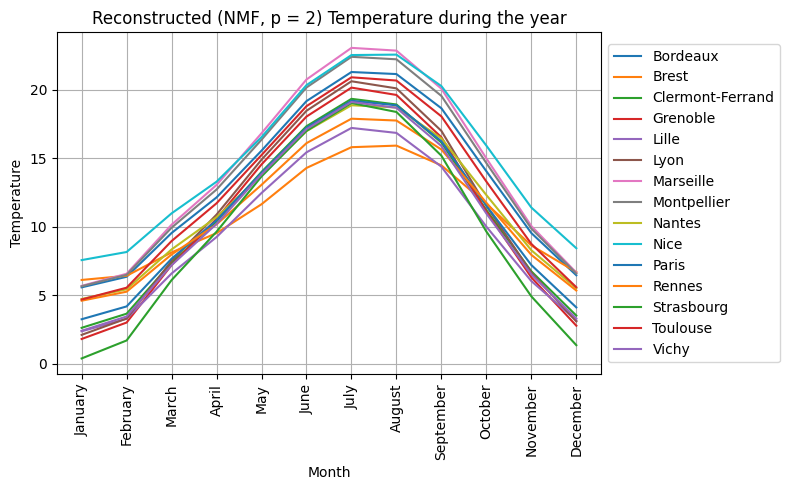

In [52]:
# Reconstruct the data from the projected samples
temper_nmf_reconstructed = temper_nmf.inverse_transform(temper_nmf_projected)
pl.figure(figsize=(8, 5))
for i in range(15):
    pl.plot(months, temper_nmf_reconstructed[i], label=villes[i])
pl.xlabel('Month')
pl.ylabel('Temperature')
pl.title("Reconstructed (NMF, p = 2) Temperature during the year")
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.xticks(rotation=90)
pl.grid(True)
pl.tight_layout()
pl.show()

# Digits Dataset:

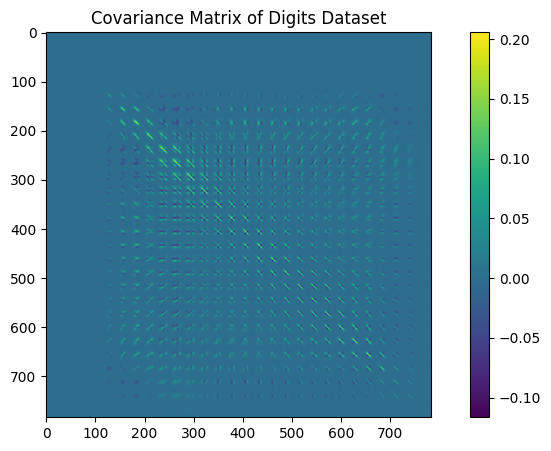

In [53]:
# Compute the covariance matrix of the digits dataset
digits_cov = np.cov(x2.T)
# Plot the covariance matrix
pl.figure(figsize=(10, 5))
pl.imshow(digits_cov)
pl.colorbar()
pl.title('Covariance Matrix of Digits Dataset')
pl.show()

The high values present at the primary diagonal representing the features' variances.

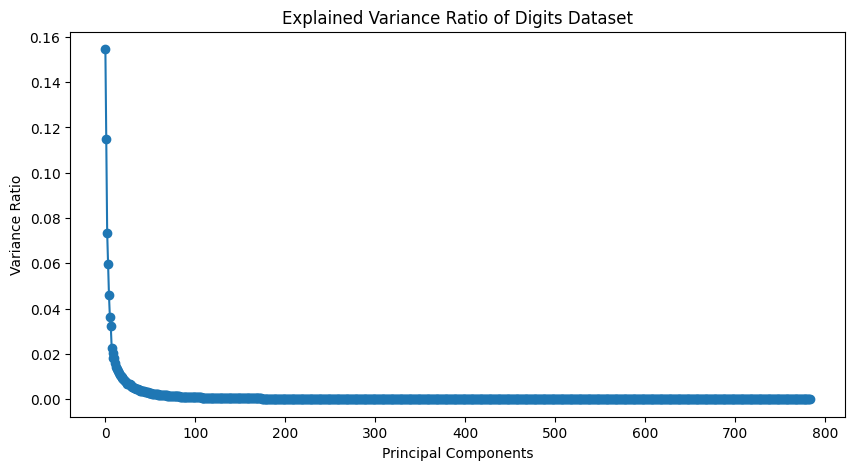

In [54]:
# Compute the PCA of digits dataset
digits_pca = PCA(n_components=None).fit(x2)
# Recover the explained variance ratio
pl.figure(figsize = (10, 5))
pl.plot(digits_pca.explained_variance_ratio_, marker='o')
pl.xlabel('Principal Components')
pl.ylabel('Variance Ratio')
pl.title('Explained Variance Ratio of Digits Dataset')
pl.show()

In [55]:
print('Explained variance ratios of the first two components are', digits_pca.explained_variance_ratio_[:2]*100)

Explained variance ratios of the first two components are [15.45298786 11.49759009]


When projecting on p = 2 dimensions, approximatively 27% of the dataset's information is preserved and there is considerable loss of nearly 73% when projecting to the 2D space. We cannot thus assume that the data is present in a 2D space.

In [56]:
# Project the samples in 2D
digits_pca = PCA(n_components=2).fit(x2)
digits_projected = digits_pca.transform(x2)

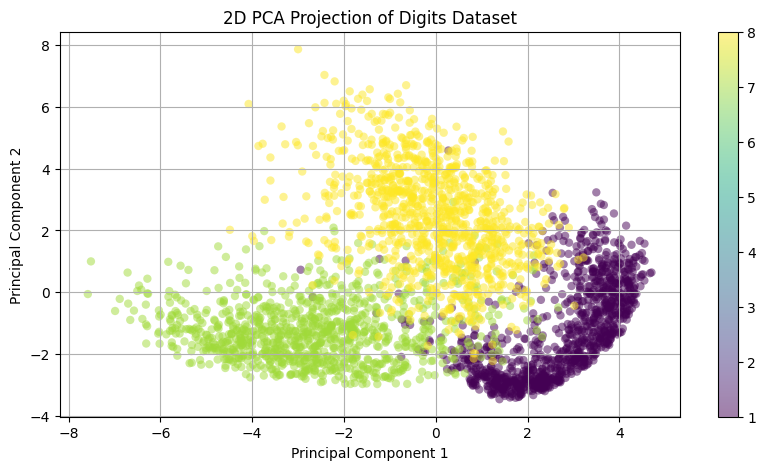

In [57]:
# Plot the projected samples
pl.figure(figsize=(10, 5))
pl.scatter(digits_projected[:, 0], digits_projected[:, 1], c=y2, edgecolor='none', alpha=0.5)

pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.title('2D PCA Projection of Digits Dataset')
pl.colorbar()
pl.grid()
pl.show()

The data is divided more or less equally between three clusters. Each cluster represent a different digit. This is already known which means that this information is preserved from before after a projection into the 2D space.

In [58]:
# The two first principal directions
digits_com = digits_pca.components_

# Retreiving features that maximize both principal components
max_features = np.argmax(abs( digits_pca.components_ ), axis=1)
print(max_features)

[378 432]


Text(0, 0.5, 'component 2')

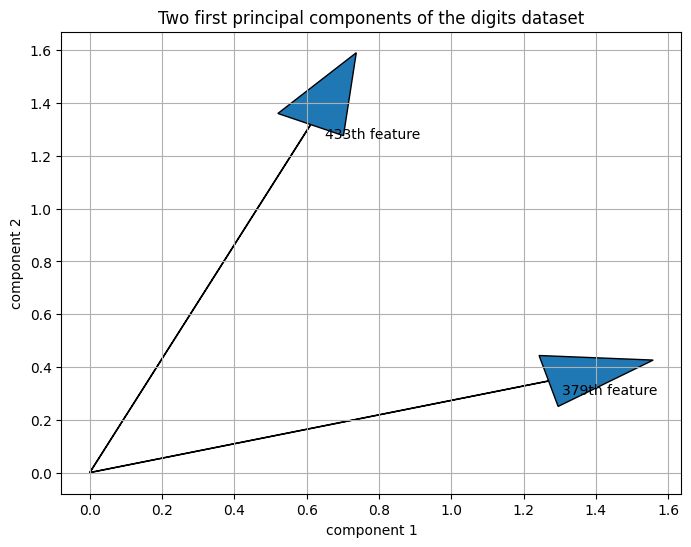

In [59]:
# Plotting the principal components
pl.figure(figsize=(8,6))

for i in max_features:
    pl.arrow(0, 0, digits_com.T[i,0]*10, digits_com.T[i,1]*10, head_width=0.2)
    pl.annotate(str(i+1)+'th feature ',
                 xy=(digits_com.T[i,0]*10, digits_com.T[i,1]*10),
                 xytext=(10, -10),
                 textcoords='offset points')

pl.grid()
pl.title('Two first principal components of the digits dataset')
pl.xlabel('component 1')
pl.ylabel('component 2')

The 379th and 433th features maximize the first and second principal components respectively. In other words, moving along the first principal components increases the 379th feature's value and moving along the second component increases that of the 433th feature. In the digits dataset case, features represent the number of pixel of the 28x28 digit image (total of 784 pixels).

Reconstructed (PCA, p = 2) Digits
Original Digits
Reconstructed (PCA, p = 50) Digits
Original Digits
Reconstructed (PCA, p = 100) Digits
Original Digits
Reconstructed (PCA, p = 150) Digits
Original Digits


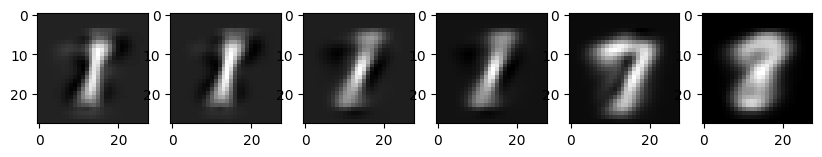

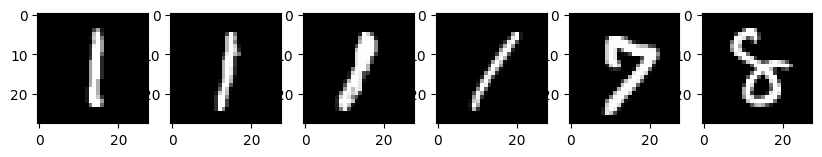

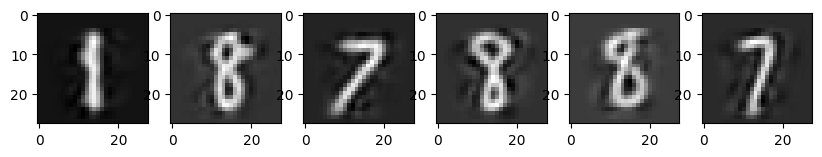

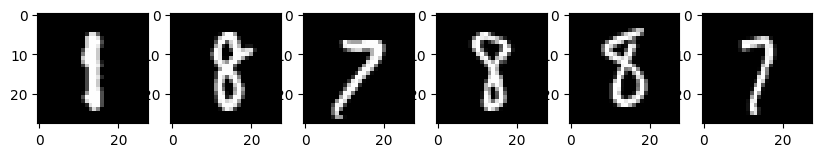

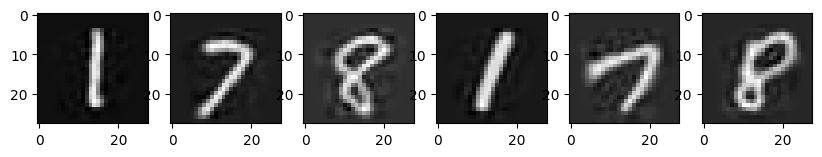

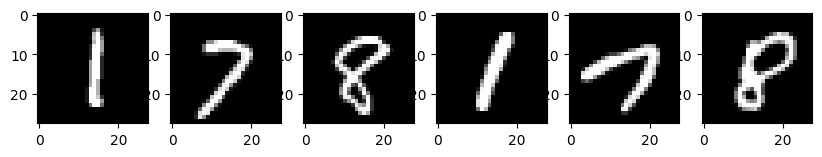

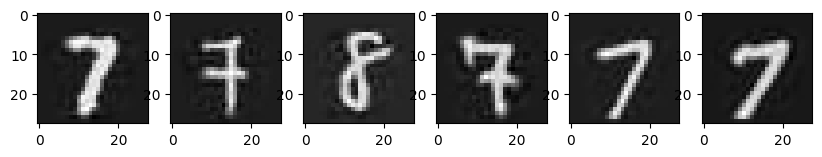

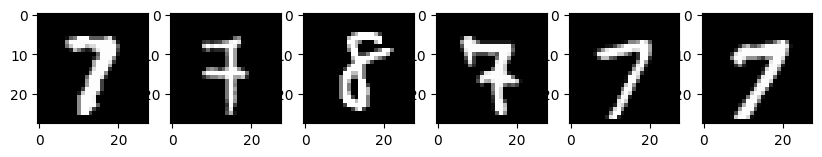

In [60]:
# Reconstruct the data from the projected samples for different values of p
c_values = [2, 50, 100, 150]
for c in c_values:
    digits_pca1 =PCA(n_components=c).fit(x2)
    digits_projected1 = digits_pca1.transform(x2)
    digits_reconstructed1 = digits_pca1.inverse_transform(digits_projected1)
    
    pl.figure(figsize=(10, 5))
    rands= np.random.randint(0, 3000, 6)
    print("Reconstructed (PCA, p = " + str(c)+ ") Digits")
    for i in range(6):
        pl.subplot(1, 6, i+1)
        pl.imshow(digits_reconstructed1[rands[i],:].reshape(28,28), cmap="gray") 
    
    pl.figure(figsize=(10, 5))
    print("Original Digits")
    for i in range(6):
        pl.subplot(1, 6, i+1)
        pl.imshow(x2[rands[i],:].reshape(28,28), cmap="gray") 

We can notice from the previous results, as we increase the number of components, the reconstructed images are much easily recognizable than those with p=2. The reconstructed and original images are nearly identical except for some negligible noise that is still present. 

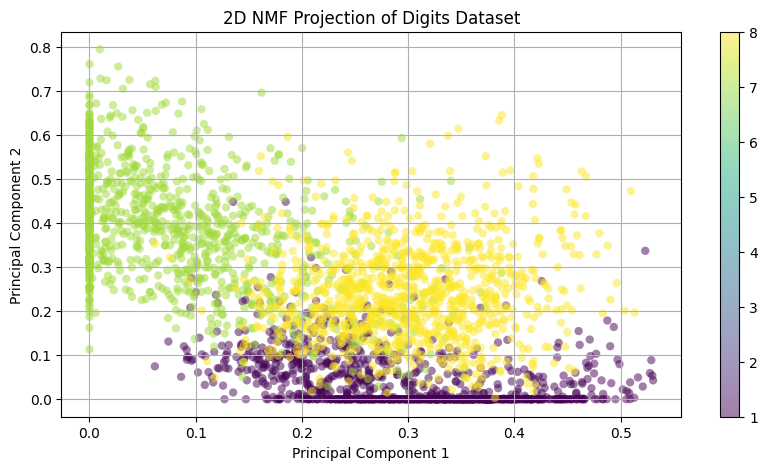

In [61]:
# Compute the NMF of digits dataset
digits_nmf = NMF(n_components=2).fit(x2)
digits_nmf_projected = digits_nmf.transform(x2)
pl.figure(figsize=(10, 5))
pl.scatter(digits_nmf_projected[:, 0], digits_nmf_projected[:, 1], c=y2, edgecolor='none', alpha=0.5)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.title('2D NMF Projection of Digits Dataset')
pl.colorbar()
pl.grid()

From this result, we can notice that the digits are still separable to three clusters. However, the clusters are not easily separable.

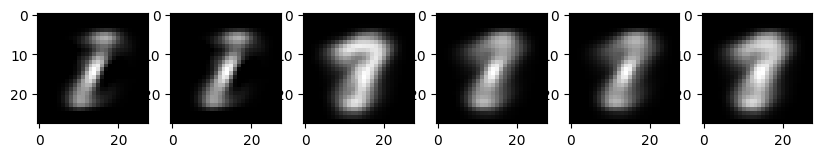

In [62]:
# Reconstruct the data from the projected sample
digits_nmf_reconstructed = digits_nmf.inverse_transform(digits_nmf_projected)

pl.figure(figsize=(10, 5))
rands= np.random.randint(0, 3000, 6)
for i in range(6):
    pl.subplot(1, 6, i+1)
    pl.imshow(digits_nmf_reconstructed[rands[i],:].reshape(28,28), cmap="gray") 

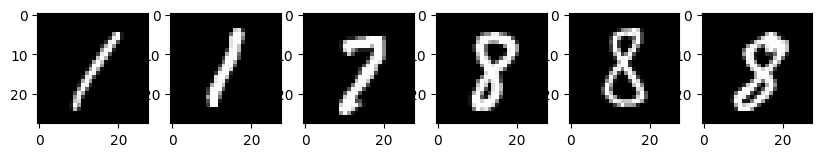

In [64]:
# The corresponding original digits
pl.figure(figsize=(10, 5))
for i in range(6):
    pl.subplot(1, 6, i+1)
    pl.imshow(x2[rands[i],:].reshape(28,28), cmap="gray") 

We can notice that using NMF with two components, it is not easy to recognize the digits in the reconstructed images comapred to their original images.

# 4.2) Manifold Learning : TSNE


# Temperature Dataset:

In [65]:
# Compute the TSNE embedding of the temperature dataset
temper_embedded = TSNE(n_components=2, perplexity=14).fit_transform(x1[:, :12])

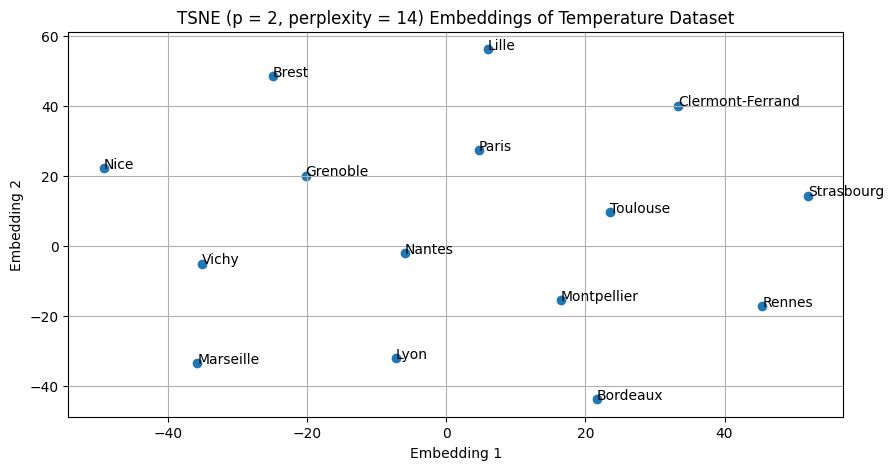

In [66]:
# Project the sample and plot them
pl.figure(figsize=(10, 5))

pl.scatter(temper_embedded[:, 0], temper_embedded[:, 1])

for i in range(15):
    pl.annotate(villes[i], (temper_embedded[i,0], temper_embedded[i, 1]))
    
pl.xlabel('Embedding 1')
pl.ylabel('Embedding 2')
pl.title('TSNE (p = 2, perplexity = 14) Embeddings of Temperature Dataset')
pl.grid()

Using the maximum value of perplexity, the geographical positions of the cities aren't recovered. This is because the cities that are originally close to each other, such as Toulouse, Bordeaux, Montpellier, Marseille, Nice, aren't anymore with TSNE for a number of components equal to 2.

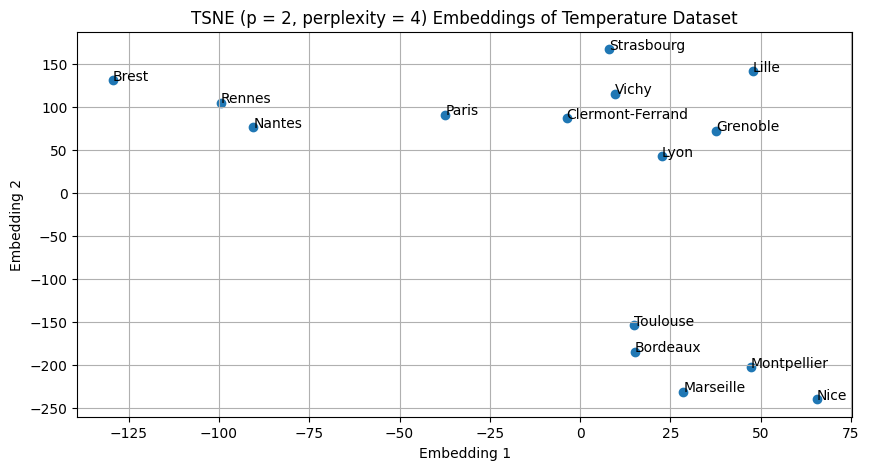

In [67]:
# Effect of the perplexity parameter
temper_embedded_ = TSNE(n_components=2, perplexity = 4).fit_transform(x1[:, :12])
pl.figure(figsize=(10, 5))

pl.scatter(temper_embedded_[:, 0], temper_embedded_[:, 1])

for i in range(15):
    pl.annotate(villes[i], (temper_embedded_[i,0], temper_embedded_[i, 1]))
    
pl.xlabel('Embedding 1')
pl.ylabel('Embedding 2')
pl.title('TSNE (p = 2, perplexity = 4) Embeddings of Temperature Dataset')
pl.grid()

The geographical locations of the cities aren't recovered for high perplexity values (perplexity = 14). However, for low perplexity value (peprplexity = 4), the geographical postions of the cities are recovered. In fact, Toulouse, Bordeaux, Montpellier, Marseille and Nice remain close to each other in TSNE. Also the cities of Rennes, Brest and Nantes also remain close to each other.

# Digits Dataset:

In [68]:
# Compute the TSNE embedding of the digits dataset
digits_embedded = TSNE(n_components=2).fit_transform(x2)

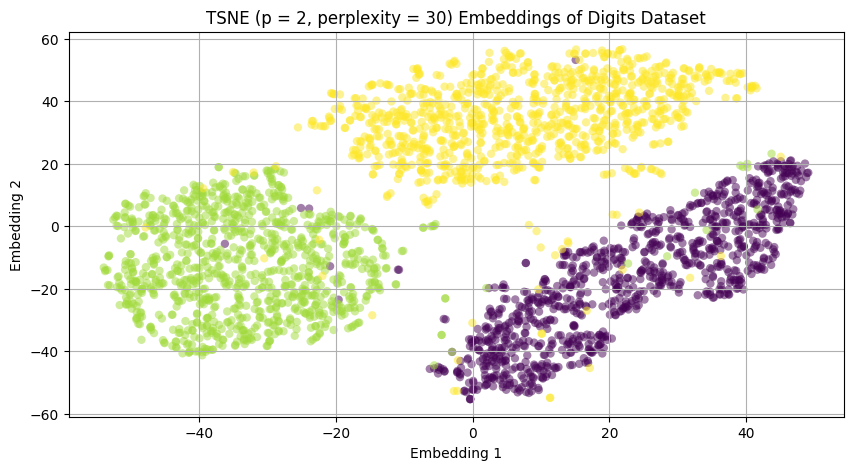

In [69]:
# Project the samples and plot them
pl.figure(figsize=(10, 5))

pl.scatter(digits_embedded[:, 0], digits_embedded[:, 1],
            c=y2, edgecolor='none', alpha=0.5)
    
pl.xlabel('Embedding 1')
pl.ylabel('Embedding 2')
pl.title('TSNE (p = 2, perplexity = 30) Embeddings of Digits Dataset')
pl.grid()

The results obtained are easily separable and the clusters are three, true number of digits in the dataset. We can also notice that the samples are uniformly distributed.

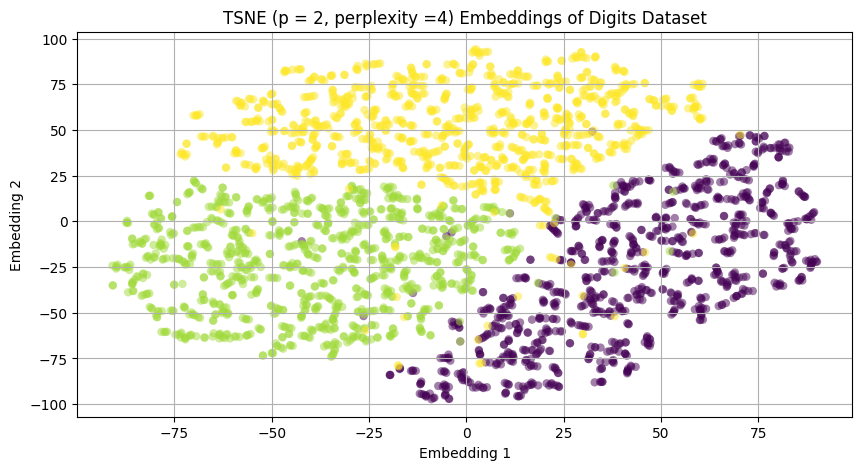

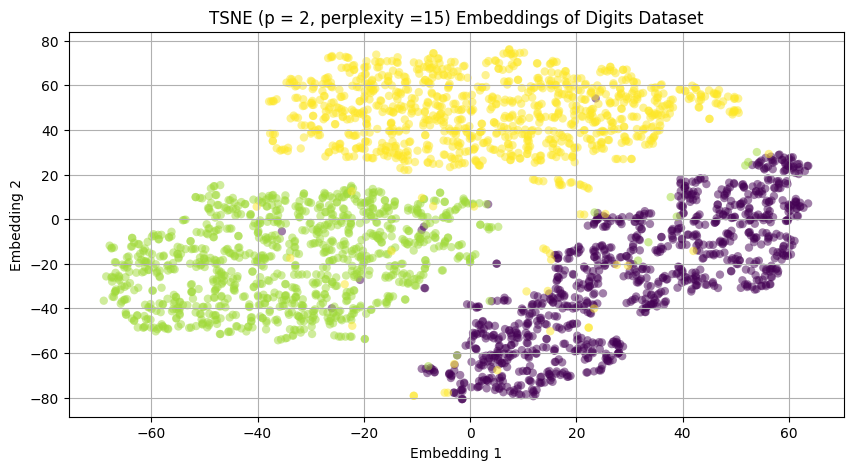

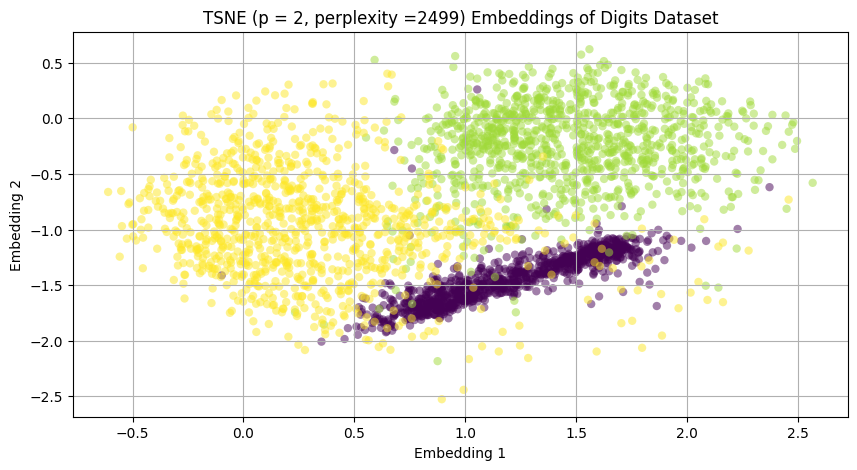

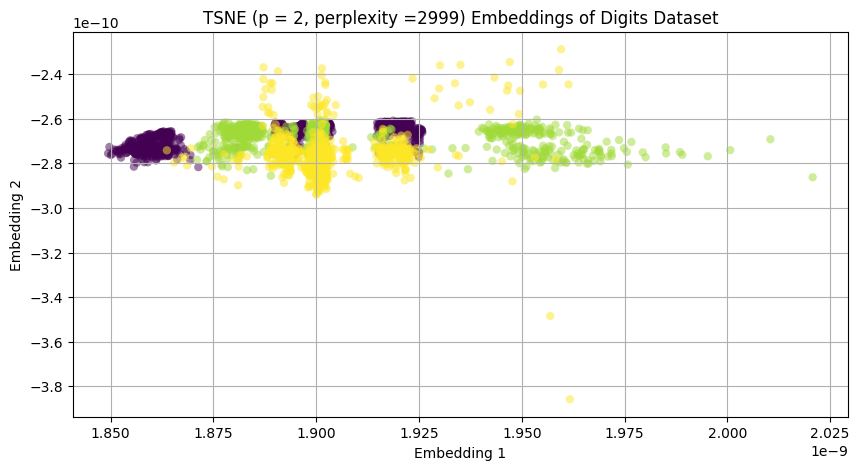

In [70]:
# Effect of the perplexity parameter
per_values = [4, 15, 2499, 2999]
for p in per_values:
    digits_embedded = TSNE(n_components=2, perplexity=p).fit_transform(x2)
    pl.figure(figsize=(10, 5))
    pl.scatter(digits_embedded[:, 0], digits_embedded[:, 1],
                c=y2, edgecolor='none', alpha=0.5)
    pl.xlabel('Embedding 1')
    pl.ylabel('Embedding 2')
    pl.title('TSNE (p = 2, perplexity =' + str(p) + ') Embeddings of Digits Dataset')
    pl.grid()

As perplexity increases, t-SNE shifts its focus from local to global structure, meaning it tries to preserve relationships between points that are farther apart in the high-dimensional space.
With too high perplexity, t-SNE may consider too many points as neighbors, causing points that are not very similar to be grouped together. This can lead to large, overlapping clusters that might not accurately reflect the smaller, more meaningful substructures in the data.

# Personal Discussion:

The lab covers algorithms that are widely used in machine learning and data analysis for various tasks, such as clustering, dimensionality reduction, and visualization.

The impressive part is changing some parameters, such as the number of clusters in the K-means algorithm, the number of componenets in PCA, and the perplexity parameter in t-SNE. Changing these parameters in the lab gives a good undersatanding of the course concepts. 

However, the lab covers more than one parameter so sometimes it is confusing. Also, Adjusting the perplexity parameter in t-SNE required several iterations of trial and error, and I found it difficult to identify an optimal value that balanced both local and global structure.

The session helped me apply the clustering and dimensionality reduction techniques covered in the course. It was satisfying to see how theoretical knowledge about the limitations of K-means could be validated when I observed its sensitivity to the number of clusters and initialization.

Overall, this session deepened my understanding of unsupervised learning algorithms and their application. It reinforced the importance of both technical implementation and critical thinking.